<a href="https://colab.research.google.com/github/Detonator1503/Final_projects/blob/main/EPL_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EPL_Player analysis
### How Mancester City team Won the EPL in 2021

The dataset contains all the data whichi is required to analyze the data

The dataset is from the Kaggle:- https://www.kaggle.com/datasets/krishanthbarkav/english-premier-leagueepl-player-statistics

In [ ]:
import pandas as pd 
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/csvs/pl_20-21.csv")
df.head()

,Unnamed: 0,Name,Position,Appearances,Clean sheets,Goals Conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big Chances Created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Yellow cards,Red cards,Fouls,Offsides,Goals,Headed goals,Goals with right foot,Goals with left foot,Hit woodwork,Goals per match,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Big chances missed,Saves,Penalties Saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks
0,0,Tammy Abraham,Forward,22,NaN,NaN,7.0,NaN,NaN,5.0,5.0,17.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,205,9.32,1.0,6.0,NaN,NaN,NaN,0,0,22,4.0,6,0.0,4.0,1.0,0.0,0.27,0.0,0.0,32.0,13.0,41%,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Che Adams,Forward,36,NaN,NaN,25.0,NaN,NaN,10.0,4.0,17.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,610,16.94,9.0,6.0,NaN,NaN,NaN,1,0,30,19.0,9,0.0,8.0,1.0,1.0,0.25,0.0,0.0,55.0,31.0,56%,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tosin Adarabioyo,Defender,33,9.0,41.0,37.0,51%,0.0,2.0,42.0,193.0,99.0,0.0,143.0,136.0,83.0,11.0,83.0,39.0,1.0,1.0,0,"1,905",57.73,0.0,2.0,0%,0.0,118.0,1,0,16,2.0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Dennis Adeniran,Midfielder,0,NaN,NaN,0.0,0%,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0,0,0.00,0.0,0.0,0%,0.0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0%,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Adrián,Goalkeeper,3,1.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0,80,26.67,NaN,NaN,NaN,NaN,10.0,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0,3.0,0.0,0.0,4.0,19.0,22.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              862 non-null    int64  
 1   Name                    862 non-null    object 
 2   Position                862 non-null    object 
 3   Appearances             862 non-null    int64  
 4   Clean sheets            380 non-null    float64
 5   Goals Conceded          380 non-null    float64
 6   Tackles                 757 non-null    float64
 7   Tackle success %        581 non-null    object 
 8   Last man tackles        275 non-null    float64
 9   Blocked shots           757 non-null    float64
 10  Interceptions           757 non-null    float64
 11  Clearances              757 non-null    float64
 12  Headed Clearance        757 non-null    float64
 13  Clearances off line     275 non-null    float64
 14  Recoveries              581 non-null    fl

In [ ]:
# Players with Appearances = 0
pl21 = df[df["Appearances"] != 0]

In [ ]:
pl21.shape

(488, 54)

In [ ]:
# Looking for the top 10 goalscorers 
Top_goal_scores = pl21.nlargest(10, ["Goals"])
Top_goal_scores

,Unnamed: 0,Name,Position,Appearances,Clean sheets,Goals Conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big Chances Created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Yellow cards,Red cards,Fouls,Offsides,Goals,Headed goals,Goals with right foot,Goals with left foot,Hit woodwork,Goals per match,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Big chances missed,Saves,Penalties Saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks
405,405,Harry Kane,Forward,35,NaN,NaN,22.0,NaN,NaN,28.0,11.0,39.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,908,25.94,14.0,38.0,NaN,NaN,NaN,1,0,26,13.0,23,4.0,16.0,3.0,9.0,0.66,4.0,0.0,137.0,53.0,39%,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
550,550,Mohamed Salah,Forward,37,NaN,NaN,18.0,NaN,NaN,36.0,1.0,10.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,"1,263",34.14,12.0,29.0,NaN,NaN,NaN,0,0,22,13.0,22,2.0,1.0,19.0,1.0,0.59,6.0,0.0,126.0,52.0,41%,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,122,Bruno Fernandes,Midfielder,37,NaN,NaN,57.0,53%,NaN,37.0,26.0,27.0,16.0,NaN,162.0,147.0,217.0,23.0,16.0,43.0,NaN,0.0,12,"2,112",57.08,20.0,166.0,25%,12.0,142.0,6,0,43,3.0,18,1.0,16.0,1.0,3.0,0.49,9.0,0.0,121.0,51.0,42%,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,67,Patrick Bamford,Forward,38,NaN,NaN,21.0,NaN,NaN,17.0,10.0,37.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,509,13.39,5.0,3.0,NaN,NaN,NaN,3,0,36,18.0,17,2.0,2.0,13.0,4.0,0.45,2.0,0.0,107.0,48.0,45%,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,737,Son Heung-Min,Forward,37,NaN,NaN,32.0,NaN,NaN,15.0,14.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,"1,057",28.57,14.0,148.0,NaN,NaN,NaN,0,0,14,16.0,17,1.0,11.0,5.0,5.0,0.46,1.0,0.0,68.0,36.0,53%,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,138,Dominic Calvert-Lewin,Forward,33,NaN,NaN,17.0,NaN,NaN,11.0,6.0,33.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,675,20.45,1.0,9.0,NaN,NaN,NaN,3,0,37,18.0,16,7.0,8.0,1.0,1.0,0.48,0.0,0.0,83.0,46.0,55%,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
801,801,Jamie Vardy,Forward,34,NaN,NaN,18.0,NaN,NaN,15.0,4.0,31.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,434,12.76,9.0,20.0,NaN,NaN,NaN,1,0,26,36.0,15,1.0,13.0,1.0,4.0,0.44,8.0,0.0,82.0,38.0,46%,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
818,818,Ollie Watkins,Forward,37,NaN,NaN,29.0,NaN,NaN,26.0,7.0,23.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,804,21.73,8.0,22.0,NaN,NaN,NaN,2,1,47,31.0,14,3.0,7.0,4.0,7.0,0.38,1.0,0.0,97.0,45.0,46%,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325,325,Ilkay Gündogan,Midfielder,28,NaN,NaN,25.0,60%,NaN,11.0,20.0,9.0,5.0,NaN,132.0,89.0,75.0,27.0,12.0,13.0,NaN,0.0,2,"1,714",61.21,3.0,30.0,30%,4.0,45.0,1,0,8,1.0,13,1.0,9.0,3.0,0.0,0.46,1.0,0.0,54.0,22.0,41%,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436,436,Alexandre Lacazette,Forward,31,NaN,NaN,18.0,NaN,NaN,5.0,12.0,13.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,514,16.58,2.0,3.0,NaN,NaN,NaN,3,0,37,8.0,13,2.0,8.0,3.0,1.0,0.42,3.0,0.0,45.0,29.0,64%,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


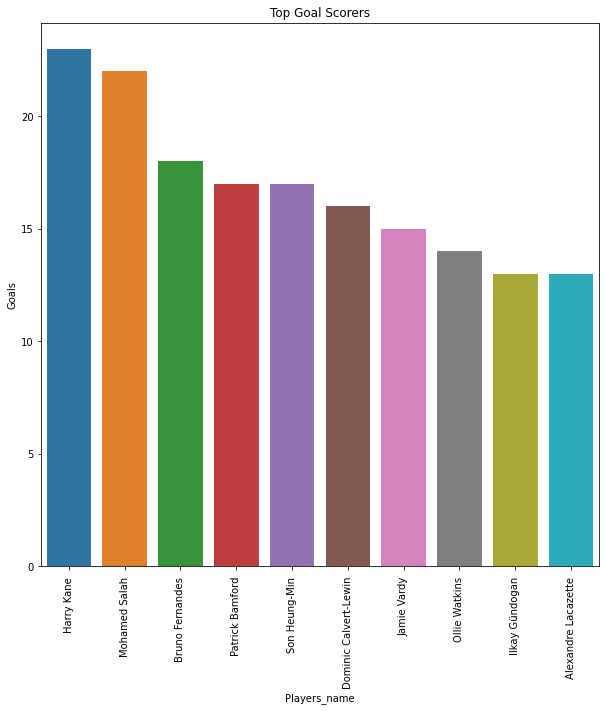

In [ ]:
# Plotting them 
plt.figure(figsize = (10,10))
sns.barplot(x = Top_goal_scores["Name"], 
            y = Top_goal_scores["Goals"])
plt.xticks(rotation = 90)
plt.title("Top Goal Scorers")
plt.xlabel("Players_name")
plt.show();

There's no player of Manchester City FC in the Top 10 list of assists

Lets look in the top 40  

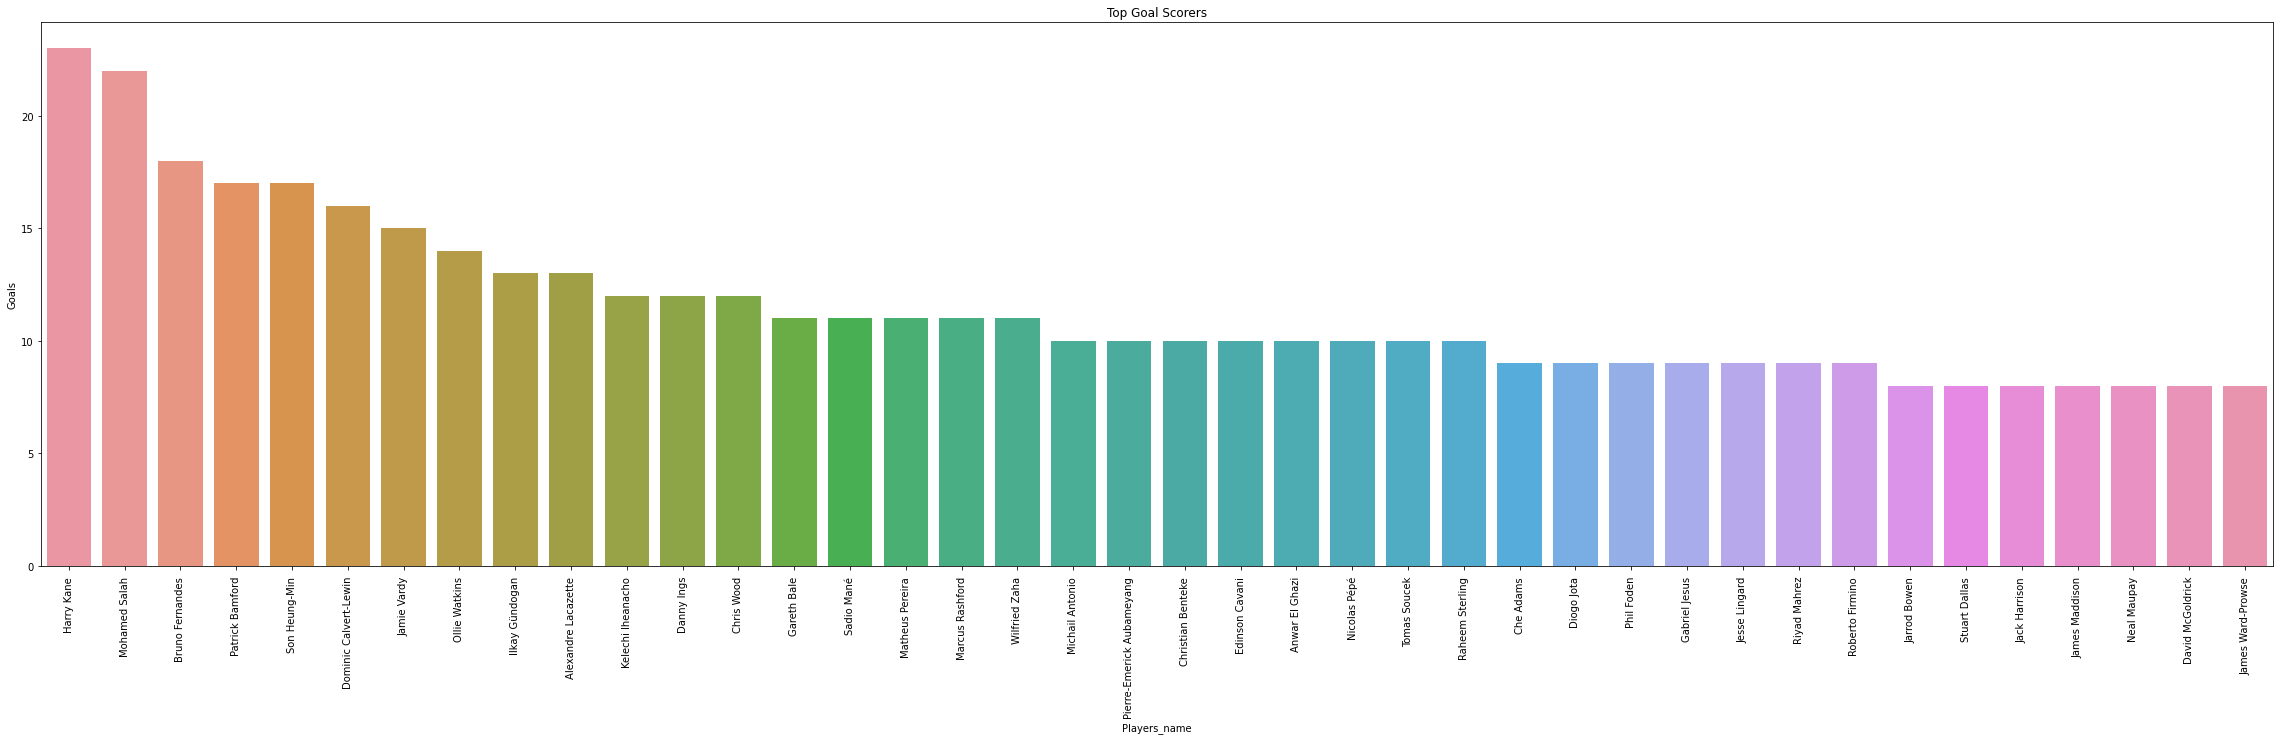

In [ ]:
Top_goal_scores = pl21.nlargest(40, ["Goals"])
# Plotting them 
plt.figure(figsize = (40,10))
sns.barplot(x = Top_goal_scores["Name"], 
            y = Top_goal_scores["Goals"])
plt.xticks(rotation = 90)
plt.title("Top Goal Scorers")
plt.xlabel("Players_name")
plt.show();

In [ ]:
Top_goal_scores[["Name", "Goals"]]

,Name,Goals
405,Harry Kane,23
550,Mohamed Salah,22
122,Bruno Fernandes,18
67,Patrick Bamford,17
737,Son Heung-Min,17
138,Dominic Calvert-Lewin,16
801,Jamie Vardy,15
818,Ollie Watkins,14
325,Ilkay Gündogan,13
436,Alexandre Lacazette,13


There were 6 players in the top 40 goal scorers named as **Ilkay Gündogan, Raheem Sterling, Phil Foden, Gabriel Jesus, Riyad Mahrz and Jack Harrison** with 58 goals scored out of 83 goals scored in entire season.  Where Ilkay Gündogan with 13,  Raheem Sterling with 10, Jack Harrison with 8 goals and others with 9 each. This shows the overall contribution of the team players 

In [ ]:
# Looking for top 10 Assists 
assists = pl21.nlargest(10, ["Assists"])

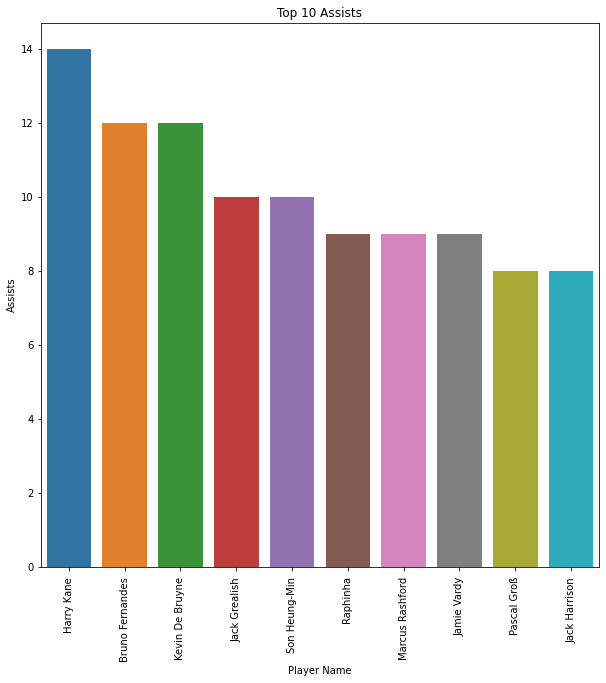

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(x = assists["Name"], 
            y = assists["Assists"])
plt.title("Top 10 Assists")
plt.xlabel("Player Name")
plt.xticks(rotation = 90)
plt.show();

There's no player of Manchester City FC in the Top 10 list of assists 

Lets look in the top 30

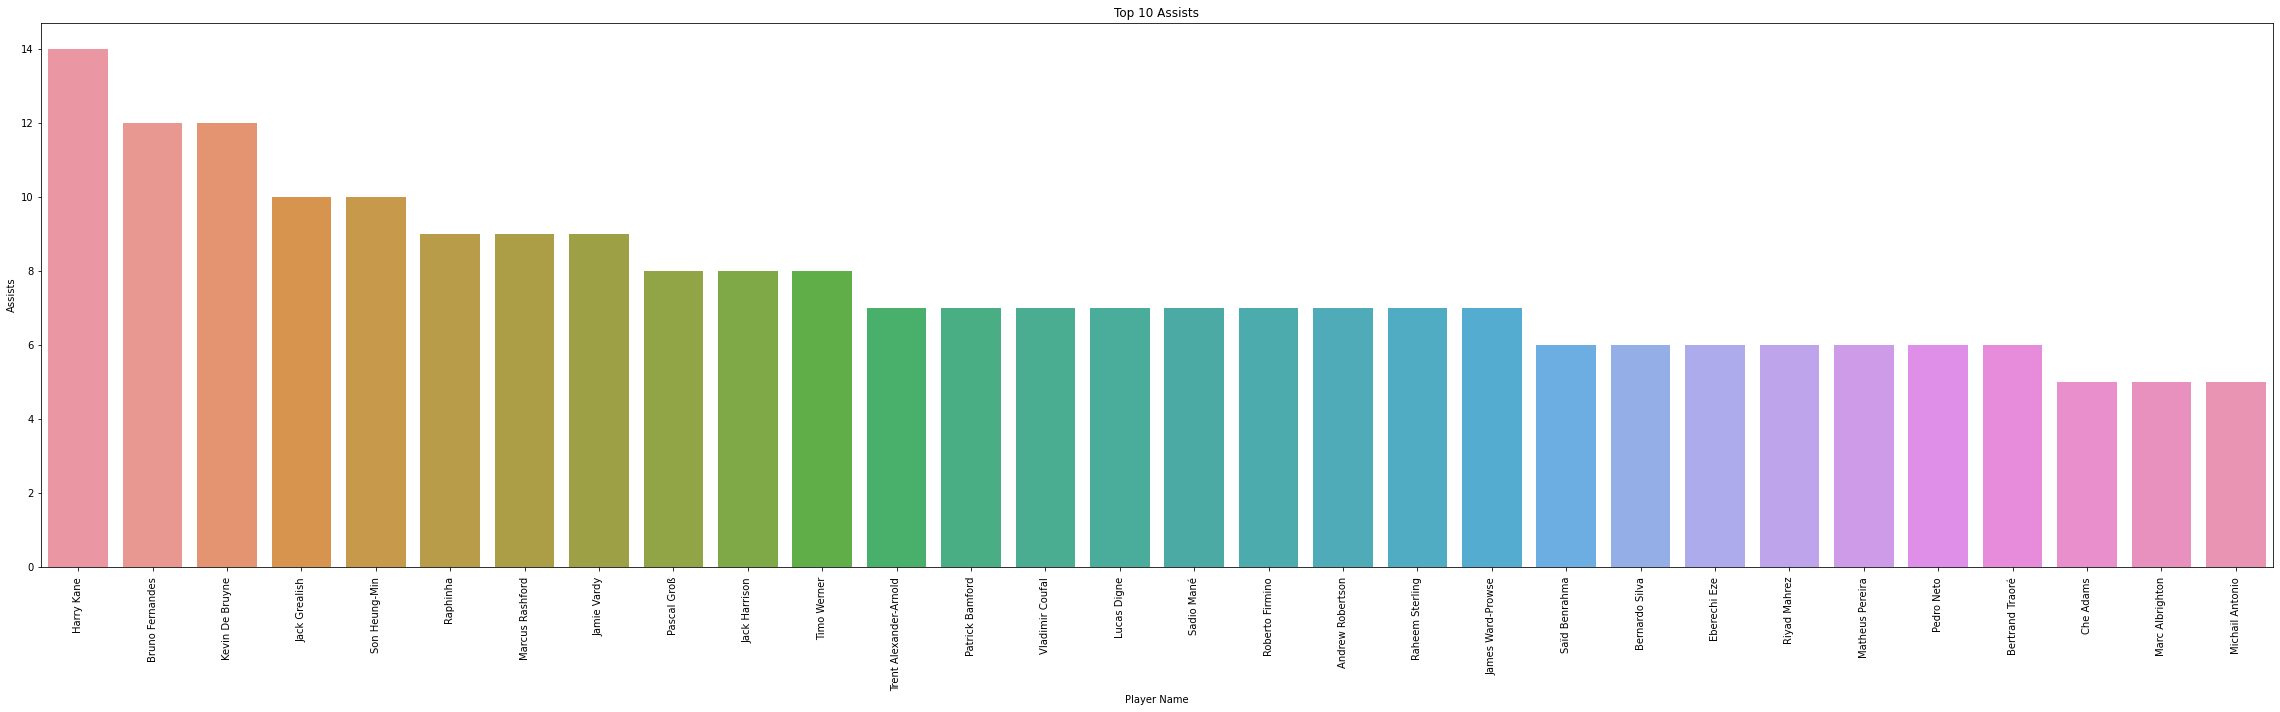

In [ ]:
assists = pl21.nlargest(30, ["Assists"])
plt.figure(figsize = (40,10))
sns.barplot(x = assists["Name"], 
            y = assists["Assists"])
plt.title("Top 10 Assists")
plt.xlabel("Player Name")
plt.xticks(rotation = 90)
plt.show();

In [ ]:
assists[["Name", "Assists"]]

,Name,Assists
405,Harry Kane,14
122,Bruno Fernandes,12
197,Kevin De Bruyne,12
315,Jack Grealish,10
737,Son Heung-Min,10
650,Raphinha,9
651,Marcus Rashford,9
801,Jamie Vardy,9
317,Pascal Groß,8
336,Jack Harrison,8


There were 4 players in the top 30 goal scorers named as **Jack Harrison, Raheem Sterling, Bernardo Silva and Riyad Mahrz** with 27 goal assists out of 83 goals.  Where Jack Harrison with 8 goal assist , Raheem Sterling with 7 and  others with 6 each. This shows the overall contribution of the team players

Also the Players Raheem Sterling, Jack Harrison, Riyad Mahrz and Ilkay Gündogan were contributing a lot for the team 

let see further with contributions

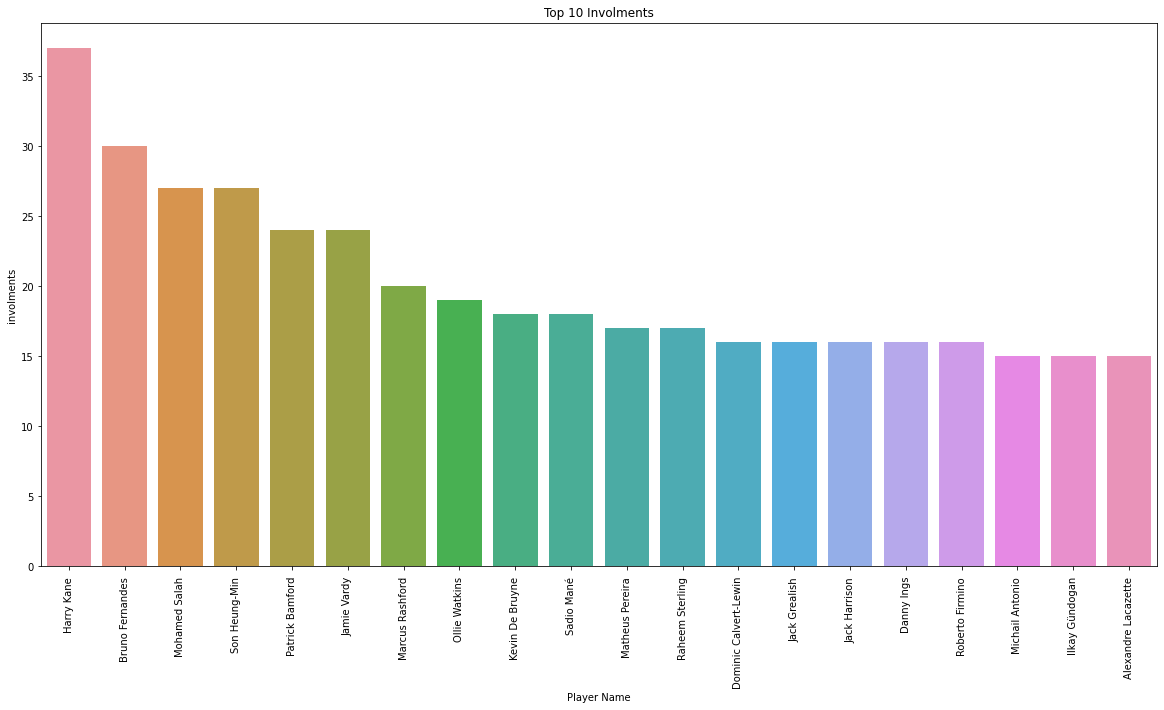

In [ ]:
pl21["involments"] = pl21["Goals"] + pl21["Assists"]
contribution = pl21.nlargest(20, ["involments"])
plt.figure(figsize = (20,10))
sns.barplot(x = contribution["Name"], 
            y = contribution["involments"])
plt.title("Top 10 Involments")
plt.xlabel("Player Name")
plt.xticks(rotation = 90)
plt.show();

As we know Only scoring Goals is not that important, saving goals and tackling is also an important part of the game 

Lets see the best Midfielders list 

In [ ]:
midfielders = pl21[pl21["Position"] == "Midfielder"]

In [ ]:
interception = midfielders.nlargest(10, ['Interceptions'])[["Name","Interceptions"]]
interception

,Name,Interceptions
121,Josh Brownhill,69.0
681,Rúben Neves,65.0
101,Yves Bissouma,64.0
740,Tomas Soucek,62.0
572,Wilfred Ndidi,61.0
406,N'Golo Kanté,59.0
659,Declan Rice,59.0
851,André-Frank Zambo Anguissa,56.0
689,Romain Saïss,52.0
654,Harrison Reed,50.0


In [ ]:
duels  = midfielders.nlargest(10, 'Duels won')[['Name','Duels won']]
duels

,Name,Duels won
740,Tomas Soucek,364.0
851,André-Frank Zambo Anguissa,264.0
315,Jack Grealish,231.0
101,Yves Bissouma,227.0
364,Pierre-Emile Højbjerg,217.0
775,Youri Tielemans,217.0
524,John McGinn,211.0
672,Rodri,209.0
287,Conor Gallagher,196.0
573,Tanguy Ndombele,186.0


In [ ]:
tackles = midfielders.nlargest(10, 'Tackles')[['Name', 'Tackles']]
tackles

,Name,Tackles
101,Yves Bissouma,104.0
364,Pierre-Emile Højbjerg,98.0
572,Wilfred Ndidi,96.0
681,Rúben Neves,86.0
775,Youri Tielemans,86.0
277,Fred,81.0
287,Conor Gallagher,81.0
23,Allan,80.0
406,N'Golo Kanté,79.0
740,Tomas Soucek,78.0


In [ ]:
# Rodri was Best in the Manchester City FC team for duels getting spot in Top 10

In [ ]:
# For Defenders
GK = pl21[pl21["Position"] == "Goalkeeper"]

In [ ]:
GK.shape

(39, 55)

In [ ]:
gk_for_MCFC = ['Zack Steffen','Ederson',	'Scott Carson']
GK["Name"] 

4                      Adrián 
22                    Alisson 
41            Alphonse Areola 
43          Kepa Arrizabalaga 
130              Jack Butland 
131              David Button 
133           Willy Caballero 
145              Scott Carson 
191               Karl Darlow 
199              David de Gea 
228           Martin Dúbravka 
235                   Ederson 
244         Emiliano Martínez 
249          Lukasz Fabianski 
272            Fraser Forster 
321            Vicente Guaita 
390             João Virgínia 
396             Sam Johnstone 
414         Caoimhin Kelleher 
418              Kiko Casilla 
455                Bernd Leno 
465               Hugo Lloris 
533             Édouard Mendy 
535             Illan Meslier 
583               Will Norris 
599               Robin Olsen 
619    Bailey Peacock-Farrell 
631           Jordan Pickford 
635                 Nick Pope 
647            Aaron Ramsdale 
649           Darren Randolph 
670               Marek Rodák 
683     

In [ ]:
GK.drop("Unnamed: 0", axis =1, inplace = True)

In [ ]:
top_gk = GK.nlargest(20, ["Saves"])
top_gk[["Name", "Saves", "Appearances"]]

,Name,Saves,Appearances
396,Sam Johnstone,166.0,37
647,Aaron Ramsdale,147.0,38
244,Emiliano Martínez,142.0,38
535,Illan Meslier,140.0,35
41,Alphonse Areola,116.0,36
465,Hugo Lloris,114.0,38
635,Nick Pope,114.0,32
321,Vicente Guaita,106.0,37
249,Lukasz Fabianski,103.0,35
685,Rui Patrício,100.0,37


In [ ]:
goal_k = GK[GK["Appearances"] >= 36]

In [ ]:
goal_k[["Name", "Saves", "Appearances","Goals Conceded", "Clean sheets"]]

,Name,Saves,Appearances,Goals Conceded,Clean sheets
41,Alphonse Areola,116.0,36,48.0,9.0
235,Ederson,66.0,36,28.0,19.0
244,Emiliano Martínez,142.0,38,46.0,15.0
321,Vicente Guaita,106.0,37,64.0,8.0
396,Sam Johnstone,166.0,37,74.0,6.0
465,Hugo Lloris,114.0,38,45.0,12.0
647,Aaron Ramsdale,147.0,38,63.0,5.0
685,Rui Patrício,100.0,37,51.0,10.0
708,Kasper Schmeichel,88.0,38,50.0,11.0


Ederson the Goal Keeper of the Manchester City FC had conceded 28 Goals where everyone other than Ederson who played more than equal to 36 matches where above 45 Goals conceded 

But, the saves are 66 which is way more less than any other Goal keepers, so we can conclude that there was attacking approach from Manchester City FC.

Total of 94 attempts were made against Ederson which is comparably less than any other team's Goalkeeper, so we see the dominance of a team on the opposition 

# Conclusion

Overall performance of the entire team, most importantly better ball possession, and more attempt on the opposition's goal posts, aggressive approaches, proper passing were the reasons of Getting Top spot in EPL

The players like Ilkay Gündogan, Raheem Sterling, Phil Foden, Gabriel Jesus, Riyad Mahrz, Jack Harrison, Bernardo Silva and Ederson, counts to 8 players out of playing 11 were performing Incredibly well, So there was a domination on the other teams by **Manchester City FC**.